In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Read the data
df = pd.read_csv('cleaned_dataset.csv')
df.drop(columns=['Unnamed: 0','Select Printer','Material 1','Printed On','Name','Slicer Project File','Printer Note','Material 2 Cost/Unit','Material 2 Qty','Material 2','Printed On.1','Sliced by','Print ID','Creation Log','Material 2 Cost/Unit.1','Material 1 Qty'], inplace=True)


In [2]:
df.drop(columns=['Print Time (Hours)'], inplace=True)

In [3]:
df.head()

,Printer Requested,User Type,Print Cost,Material_Category1
0,Bambu Labs,Graduate,21.04,ABS
1,Bambu Labs,Graduate,2.75,PLA
2,Bambu Labs,Graduate,4.85,PLA
3,Bambu Labs,Graduate,13.73,PLA
4,Bambu Labs,Graduate,1.83,PLA


In [4]:
from kmodes.kprototypes import KPrototypes

In [5]:
ss = StandardScaler()
df[['Print Cost']] = ss.fit_transform(df[['Print Cost']])


In [6]:
df.head()

,Printer Requested,User Type,Print Cost,Material_Category1
0,Bambu Labs,Graduate,0.959896,ABS
1,Bambu Labs,Graduate,-0.255178,PLA
2,Bambu Labs,Graduate,-0.115667,PLA
3,Bambu Labs,Graduate,0.474265,PLA
4,Bambu Labs,Graduate,-0.316297,PLA


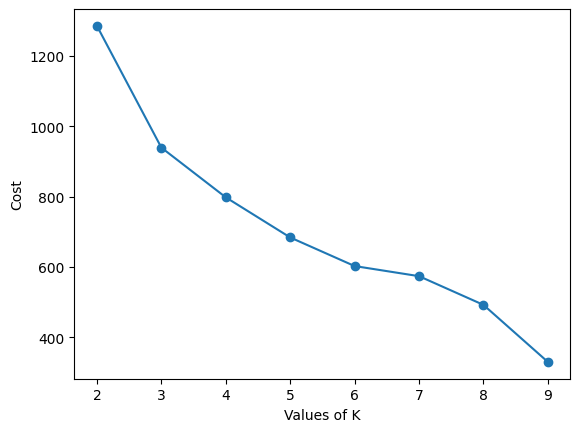

In [7]:
#import modules
import pandas as pd
import numpy as np
from kmodes import kprototypes
import matplotlib.pyplot as plt
#read data input

categorical_columns = ['Printer Requested', 'User Type', 'Material_Category1']
categorical_indices = [df.columns.get_loc(col) for col in categorical_columns]

#obtain array of values
data_array=df.values

elbow_scores = dict()
range_of_k = range(2,10) 
for k in range_of_k :
    untrained_model = kprototypes.KPrototypes(n_clusters=k)
    trained_model = untrained_model.fit(data_array, categorical=categorical_indices)
    elbow_scores[k]=trained_model.cost_
 
plt.plot(elbow_scores.keys(),elbow_scores.values())
plt.scatter(elbow_scores.keys(),elbow_scores.values())
plt.xlabel("Values of K") 
plt.ylabel("Cost") 
plt.show()

In [8]:
df.head()

,Printer Requested,User Type,Print Cost,Material_Category1
0,Bambu Labs,Graduate,0.959896,ABS
1,Bambu Labs,Graduate,-0.255178,PLA
2,Bambu Labs,Graduate,-0.115667,PLA
3,Bambu Labs,Graduate,0.474265,PLA
4,Bambu Labs,Graduate,-0.316297,PLA


In [9]:
import pandas as pd
from kmodes.kprototypes import KPrototypes

all_features = df.columns

# Identify categorical columns (by name or index)
categorical_columns = ['Printer Requested', 'User Type', 'Material_Category1']
categorical_indices = [df.columns.get_loc(col) for col in categorical_columns]

# Prepare data: fill NA and convert to string for categorical, float for numeric
df_kproto = df[all_features].copy()
for col in categorical_columns:
    df_kproto[col] = df_kproto[col].astype(str)
for col in df_kproto.columns:
    if col not in categorical_columns:
        df_kproto[col] = pd.to_numeric(df_kproto[col], errors='coerce').fillna(0)

# Fit k-prototypes
clusters = 4
kproto = KPrototypes(n_clusters=clusters, random_state=42)
df['Cluster'] = kproto.fit_predict(df_kproto, categorical=categorical_indices)

# Print cluster sizes
print("\nCluster Sizes:")
print(df['Cluster'].value_counts().sort_index())

# Print characteristics of each cluster
print("\nCluster Characteristics:")
for cluster in range(clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print("\nFeature Statistics:")
    print(cluster_data[all_features].describe(include='all').round(2))


Cluster Sizes:
Cluster
0      19
1     339
2    1428
3     142
Name: count, dtype: int64

Cluster Characteristics:

Cluster 0:

Feature Statistics:
       Printer Requested      User Type  Print Cost Material_Category1
count                 19             19       19.00                 19
unique                 3              1         NaN                  3
top       Stratasys F370  Undergraduate         NaN                ABS
freq                  16             19         NaN                 17
mean                 NaN            NaN        7.87                NaN
std                  NaN            NaN        3.32                NaN
min                  NaN            NaN        4.79                NaN
25%                  NaN            NaN        5.52                NaN
50%                  NaN            NaN        6.32                NaN
75%                  NaN            NaN       10.41                NaN
max                  NaN            NaN       15.04                NaN

In [10]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA





# # Apply PCA to reduce to 3 dimensions
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(df)



# # Create a 3D scatter plot
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Create the scatter plot
# scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
#                     c=df['Cluster'], cmap='viridis', alpha=0.6)

# # Add labels and title
# ax.set_xlabel('First Principal Component')
# ax.set_ylabel('Second Principal Component')
# ax.set_zlabel('Third Principal Component')
# plt.title('3D Cluster Visualization using PCA')

# # Add a colorbar
# plt.colorbar(scatter, label='Cluster')

# # Add percentage of variance explained
# var_explained = pca.explained_variance_ratio_
# info_text = f'Variance explained:\nPC1: {var_explained[0]:.2%}\nPC2: {var_explained[1]:.2%}\nPC3: {var_explained[2]:.2%}'
# ax.text2D(0.02, 0.98, info_text, transform=ax.transAxes, 
#           bbox=dict(facecolor='white', alpha=0.8))

# # Adjust the viewing angle for better visualization
# ax.view_init(elev=20, azim=45)

# # Save the plot
# plt.plot()



In [11]:
# import seaborn as sns

# # Get only the features we used for clustering
# features = df.columns

# # Create loadings DataFrame with correct dimensions
# loadings = pd.DataFrame(
#     pca.components_.T,
#     columns=[f'PC{i+1}' for i in range(3)],  # Only 3 PCs since we used n_components=3
#     index=features
# )

# # Print the loadings
# print("\nFeature Loadings for each Principal Component:")
# print(loadings.round(3))

# # Print explained variance ratio
# print("\nExplained Variance Ratio:")
# for i, ratio in enumerate(pca.explained_variance_ratio_):
#     print(f"PC{i+1}: {ratio:.3%}")

# # Create a heatmap of the loadings
# plt.figure(figsize=(12, 8))
# sns.heatmap(loadings, annot=True, cmap='RdBu', center=0, fmt='.2f')
# plt.title('Feature Loadings for Principal Components')
# plt.tight_layout()
# plt.savefig('pca_loadings_heatmap.png', dpi=300, bbox_inches='tight')
# plt.close()

# # Print the top features for each PC
# print("\nTop features for each Principal Component:")
# for i in range(3):  # Show all 3 PCs
#     pc_loadings = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
#     print(f"\nPC{i+1} (explains {pca.explained_variance_ratio_[i]:.3%} of variance):")
#     for feature, loading in pc_loadings.items():
#         print(f"{feature}: {loading:.3f}")

In [12]:
# import seaborn as sns

# # Get only the features we used for clustering
# features = df.columns

# # Create loadings DataFrame with correct dimensions
# loadings = pd.DataFrame(
#     pca.components_.T,
#     columns=[f'PC{i+1}' for i in range(3)],  # Only 3 PCs since we used n_components=3
#     index=features
# )

# # Print the loadings
# print("\nFeature Loadings for each Principal Component:")
# print(loadings.round(3))

# # Print explained variance ratio
# print("\nExplained Variance Ratio:")
# for i, ratio in enumerate(pca.explained_variance_ratio_):
#     print(f"PC{i+1}: {ratio:.3%}")

# # Create a heatmap of the loadings
# plt.figure(figsize=(12, 8))
# sns.heatmap(loadings, annot=True, cmap='RdBu', center=0, fmt='.2f')
# plt.title('Feature Loadings for Principal Components')
# plt.tight_layout()
# plt.savefig('pca_loadings_heatmap.png', dpi=300, bbox_inches='tight')
# plt.close()

# # Print the top features for each PC
# print("\nTop features for each Principal Component:")
# for i in range(3):  # Show all 3 PCs
#     pc_loadings = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
#     print(f"\nPC{i+1} (explains {pca.explained_variance_ratio_[i]:.3%} of variance):")
#     for feature, loading in pc_loadings.items():
#         print(f"{feature}: {loading:.3f}")

In [15]:
df.columns

Index(['Printer Requested', 'User Type', 'Print Cost', 'Material_Category1',
       'Cluster'],
      dtype='object')

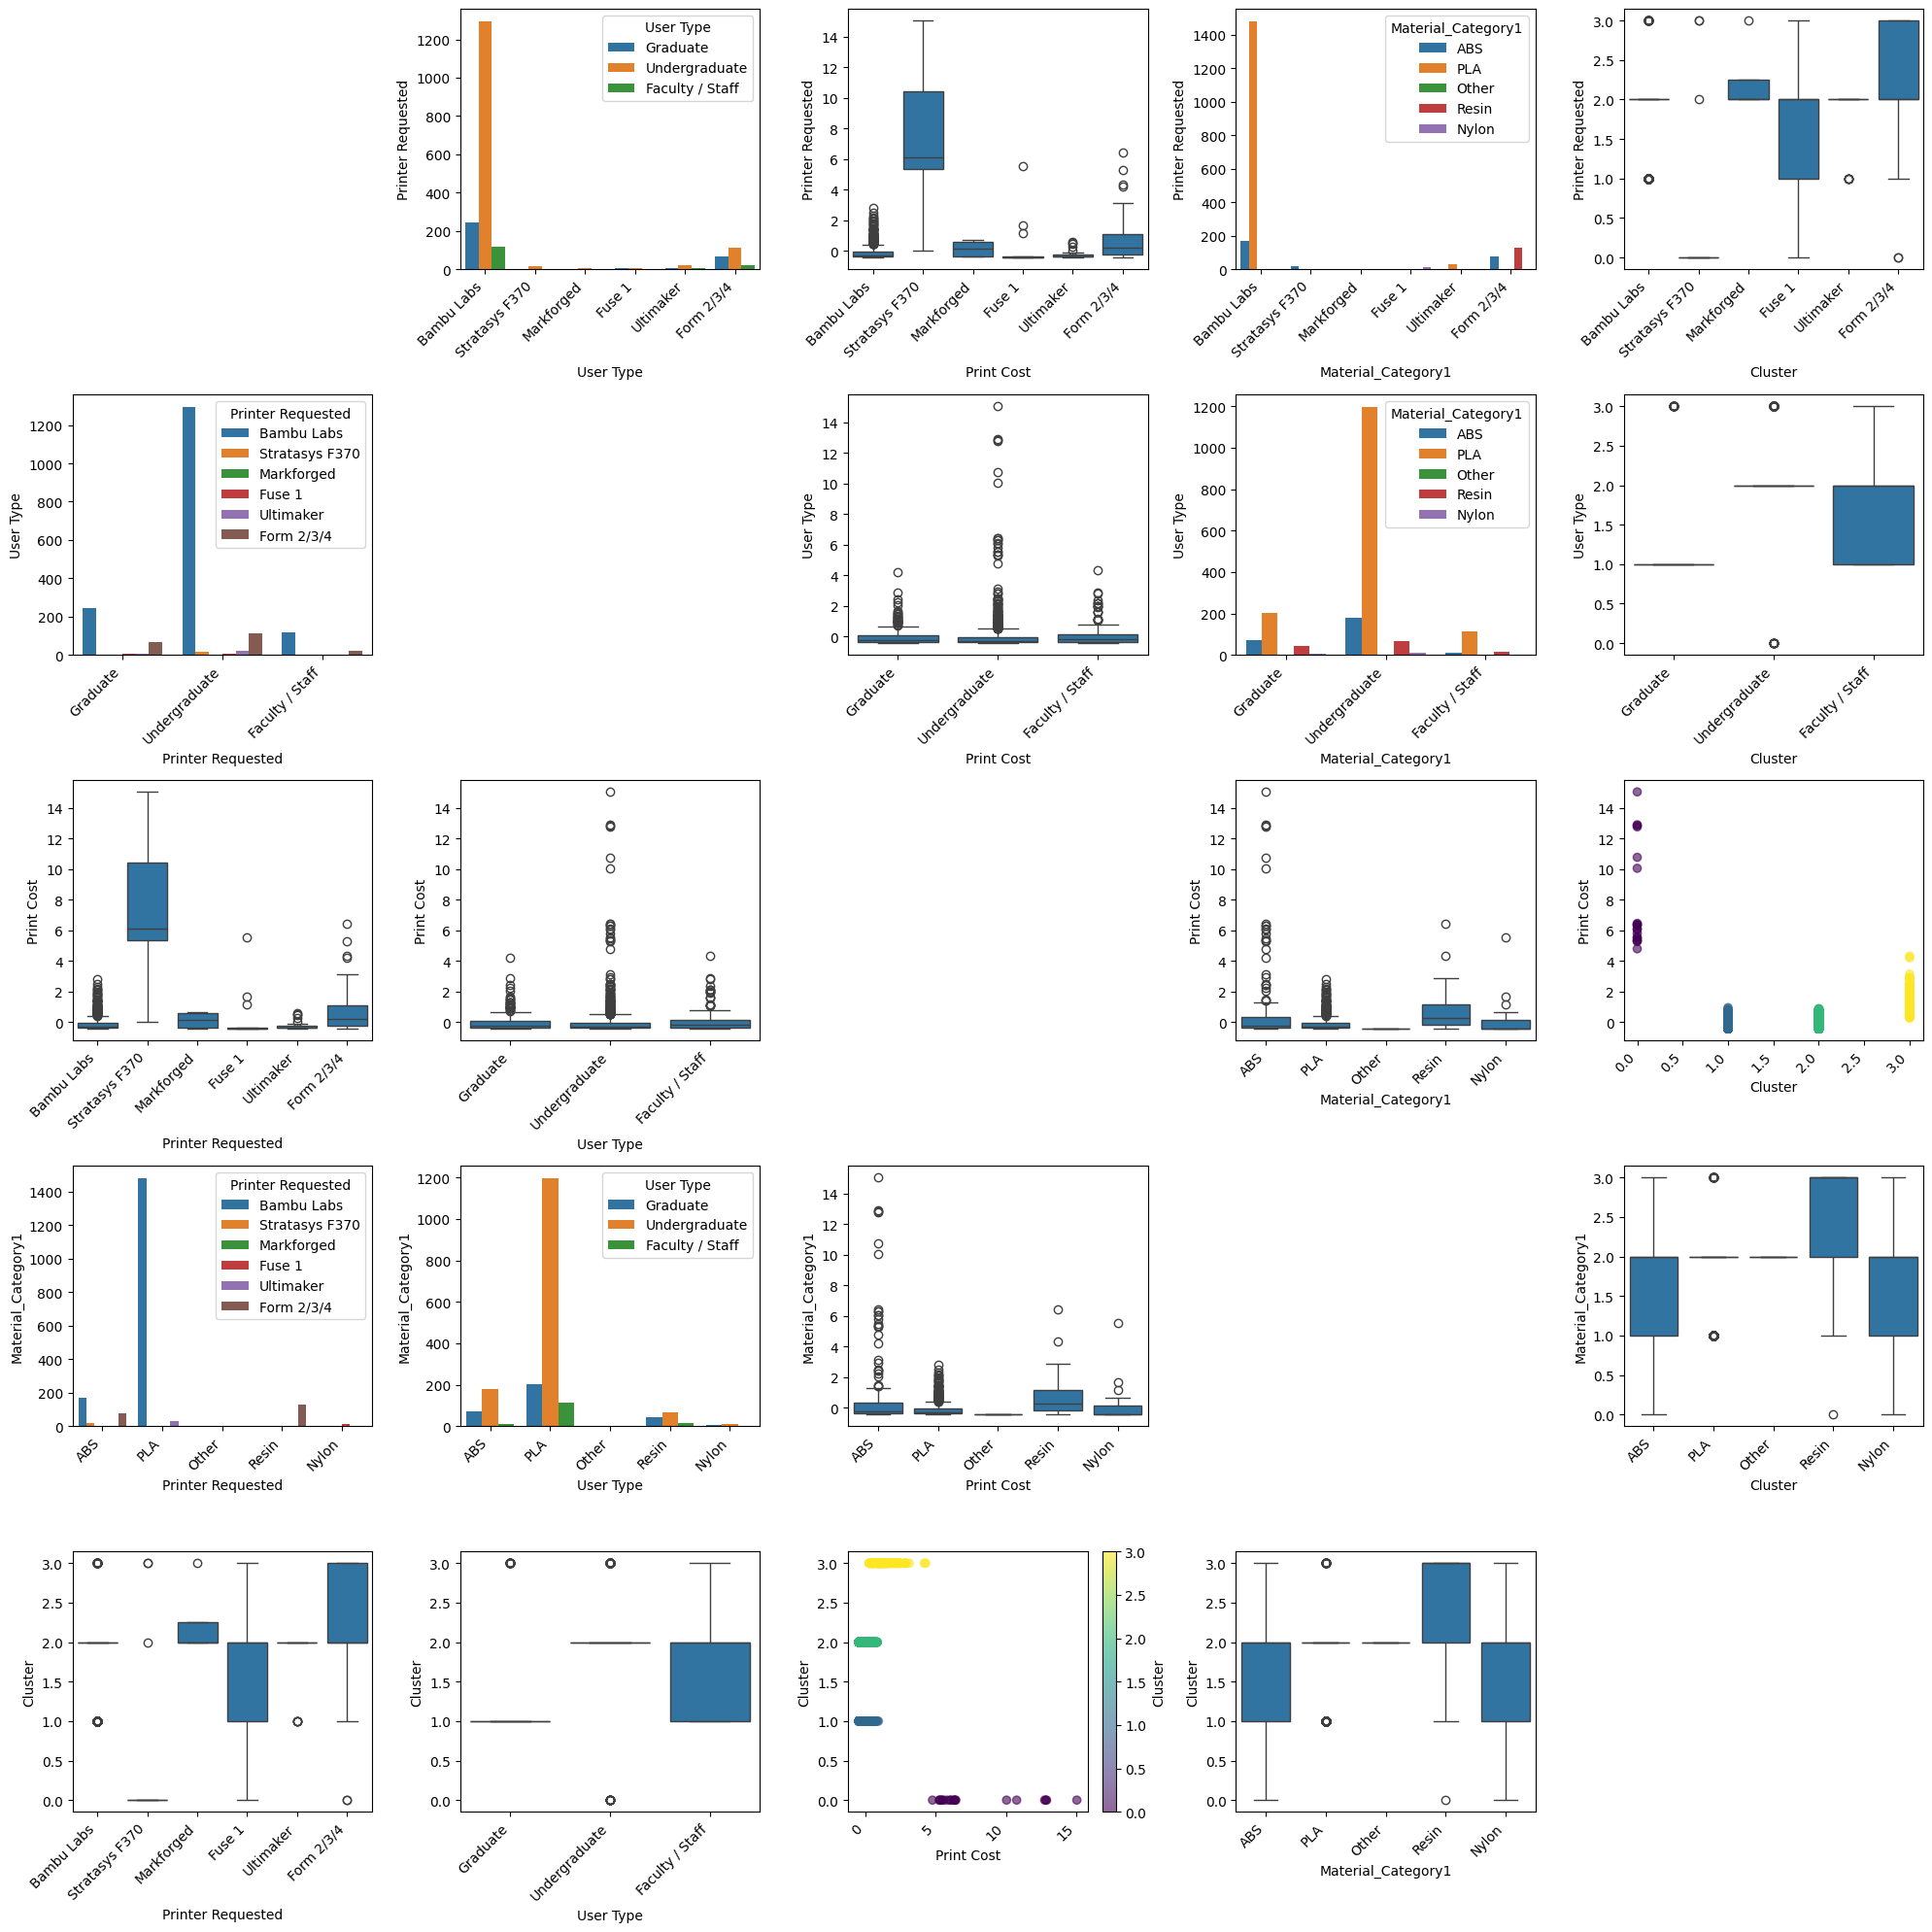

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data


# Select the columns we want to plot
columns_to_plot = df.columns

# Create a grid of scatter plots
n_cols = len(columns_to_plot)
plt.figure(figsize=(20, 20))

for i, col1 in enumerate(columns_to_plot):
    for j, col2 in enumerate(columns_to_plot):
        if i != j:  # Don't plot columns against themselves
            plt.subplot(n_cols, n_cols, i * n_cols + j + 1)
            
            # Check if both columns are numeric
            if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
                scatter = plt.scatter(df[col2], df[col1], 
                                    c=df['Cluster'], cmap='viridis', alpha=0.6)
            else:
                # For categorical columns, use a different plot type
                if pd.api.types.is_numeric_dtype(df[col1]):
                    sns.boxplot(x=df[col2], y=df[col1])
                elif pd.api.types.is_numeric_dtype(df[col2]):
                    sns.boxplot(x=df[col1], y=df[col2])
                else:
                    # For two categorical columns, use a count plot
                    sns.countplot(x=df[col1], hue=df[col2])
            
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.xticks(rotation=45, ha='right')

# Add a colorbar for the scatter plots
plt.subplot(n_cols, n_cols, n_cols * n_cols)
plt.colorbar(scatter, label='Cluster')
plt.axis('off')
plt.show() 